In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [2]:
import keras

keras.__version__

Using TensorFlow backend.


'2.3.1'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [5]:
import numpy as np
np.__version__

'1.18.4'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [0]:
#########################코드########################


white_wine = pd.read_csv('/gdrive/My Drive/winequality-white.csv',header='infer')
red_wine = pd.read_csv('/gdrive/My Drive/winequality-red.csv',header='infer')


#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [7]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [0]:
#####################################################
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
def generate_data(df, t_r):
    data = df.iloc[:,0:11]
    target = df.iloc[:,11:]
    target = target.values.reshape((target.shape[0],))
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=(1-t_r), shuffle=True, stratify=target, random_state=34)
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [12]:
x_train.shape

(3428, 11)

In [145]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
display(y_train)

array([7, 6, 5, ..., 7, 8, 6])

In [14]:
y_train.shape

(3428,)

작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [0]:
white_x_train,white_y_train,white_x_test,white_y_test = generate_data(white_wine, 0.7)
red_x_train,red_y_train,red_x_test,red_y_test = generate_data(red_wine, 0.7)

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [0]:
##########################################################
model = models.Sequential()
model.add(layers.Dense(units=32,input_dim=11,activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

###########################################################

In [149]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                330       
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________


In [0]:
from matplotlib import pyplot as plt

Epoch 1/100
343/343 [==============================] - 0s 1ms/step - loss: 5.9946 - accuracy: 0.4005
Epoch 2/100
343/343 [==============================] - 0s 1ms/step - loss: 1.6292 - accuracy: 0.4487
Epoch 3/100
343/343 [==============================] - 0s 1ms/step - loss: 1.3936 - accuracy: 0.4562
Epoch 4/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2815 - accuracy: 0.4656
Epoch 5/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2777 - accuracy: 0.4595
Epoch 6/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2548 - accuracy: 0.4597
Epoch 7/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2553 - accuracy: 0.4729
Epoch 8/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2300 - accuracy: 0.4813
Epoch 9/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2367 - accuracy: 0.4726
Epoch 10/100
343/343 [==============================] - 0s 1ms/step - loss: 1.2291 - accura

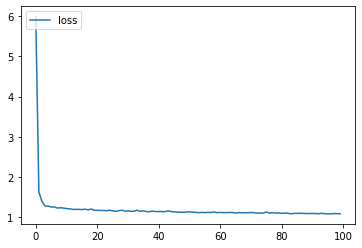

In [151]:
#white_wine에 대한 train
history = model.fit(white_x_train, white_y_train, batch_size = 10, epochs = 100)
plt.plot(history.history['loss'])
plt.legend(['loss'], loc = 'upper left')
plt.show()

In [152]:
#white wine에 대한 테스트
results = model.evaluate(white_x_test, white_y_test)
print('Test accuracy: ', results[1])

46/46 [==============================] - 0s 995us/step - loss: 1.1558 - accuracy: 0.5116
Test accuracy:  0.5115646123886108


In [0]:
##########################################################
model = models.Sequential()
model.add(layers.Dense(units=32,input_dim=11,activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

###########################################################

In [154]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                330       
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
112/112 [==============================] - 0s 1ms/step - loss: 5.0357 - accuracy: 0.3494
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 1.2621 - accuracy: 0.4665
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 1.2215 - accuracy: 0.4924
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1762 - accuracy: 0.5156
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1568 - accuracy: 0.5147
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1460 - accuracy: 0.5103
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1386 - accuracy: 0.5112
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1207 - accuracy: 0.5201
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1232 - accuracy: 0.5308
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 1.1099 - accura

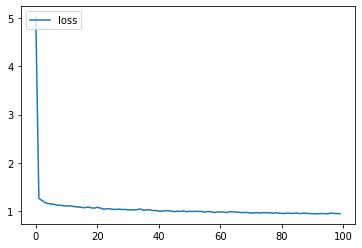

In [155]:
#red_wine에 대한 train
history = model.fit(red_x_train, red_y_train, batch_size = 10, epochs = 100)
plt.plot(history.history['loss'])
plt.legend(['loss'], loc = 'upper left')
plt.show()

In [156]:
#red wine에 대한 테스트
results = model.evaluate(red_x_test, red_y_test)
print('Test accuracy: ', results[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.9589 - accuracy: 0.5917
Test accuracy:  0.5916666388511658


### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [0]:
##########################################################
model = models.Sequential()
model.add(layers.Dense(units=32,input_dim=11,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))

model.add(layers.Dense(units=50,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=100,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=7, activation='softmax'))

############################################################

In [162]:
tf.keras.optimizers.Adam(
    learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam'
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 32)                384       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32)                128       
_________________________________________________________________
dense_63 (Dense)             (None, 50)                1650      
_________________________________________________________________
batch_normalization_21 (Batc (None, 50)                200       
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 100)               5100      
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)             

Epoch 1/100
69/69 [==============================] - 0s 5ms/step - loss: 2.6306 - accuracy: 0.2097 - val_loss: 1.8246 - val_accuracy: 0.2993
Epoch 2/100
69/69 [==============================] - 0s 3ms/step - loss: 2.0243 - accuracy: 0.3098 - val_loss: 1.4822 - val_accuracy: 0.4327
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 1.7741 - accuracy: 0.3667 - val_loss: 1.3696 - val_accuracy: 0.4435
Epoch 4/100
69/69 [==============================] - 0s 3ms/step - loss: 1.5563 - accuracy: 0.4119 - val_loss: 1.2804 - val_accuracy: 0.4463
Epoch 5/100
69/69 [==============================] - 0s 3ms/step - loss: 1.4597 - accuracy: 0.4227 - val_loss: 1.2450 - val_accuracy: 0.4510
Epoch 6/100
69/69 [==============================] - 0s 3ms/step - loss: 1.3992 - accuracy: 0.4265 - val_loss: 1.2100 - val_accuracy: 0.4517
Epoch 7/100
69/69 [==============================] - 0s 3ms/step - loss: 1.3465 - accuracy: 0.4329 - val_loss: 1.1965 - val_accuracy: 0.4531
Epoch 8/100
6

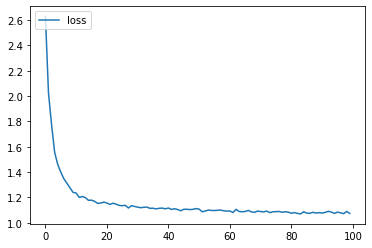

In [163]:
#white_wine에 대한 train
new_white_y_train = white_y_train-3
new_white_y_test = white_y_test-3
history = model.fit(white_x_train, new_white_y_train, batch_size = 50, epochs = 100,validation_data=(white_x_test, new_white_y_test))
plt.plot(history.history['loss'])
plt.legend(['loss'], loc = 'upper left')
plt.show()

In [164]:
#white wine에 대한 테스트
results = model.evaluate(white_x_test, new_white_y_test)
print('Test accuracy: ', results[1])

46/46 [==============================] - 0s 1ms/step - loss: 1.0865 - accuracy: 0.5150
Test accuracy:  0.5149660110473633


In [0]:
##########################################################
model = models.Sequential()
model.add(layers.Dense(units=32,input_dim=11,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))

model.add(layers.Dense(units=50,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=100,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=6, activation='softmax'))

############################################################

In [166]:
tf.keras.optimizers.Adam(
    learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam'
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 32)                384       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32)                128       
_________________________________________________________________
dense_67 (Dense)             (None, 50)                1650      
_________________________________________________________________
batch_normalization_24 (Batc (None, 50)                200       
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 100)               5100      
_________________________________________________________________
batch_normalization_25 (Batc (None, 100)             

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 2.5169 - accuracy: 0.2520 - val_loss: 1.4664 - val_accuracy: 0.4437
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 1.9085 - accuracy: 0.3619 - val_loss: 1.2530 - val_accuracy: 0.5083
Epoch 3/100
112/112 [==============================] - 0s 3ms/step - loss: 1.7422 - accuracy: 0.4066 - val_loss: 1.1678 - val_accuracy: 0.5604
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 1.5312 - accuracy: 0.4307 - val_loss: 1.1312 - val_accuracy: 0.5437
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 1.4492 - accuracy: 0.4334 - val_loss: 1.1130 - val_accuracy: 0.5500
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 1.4332 - accuracy: 0.3995 - val_loss: 1.1206 - val_accuracy: 0.5125
Epoch 7/100
112/112 [==============================] - 0s 3ms/step - loss: 1.3530 - accuracy: 0.4441 - val_loss: 1.0890 - val_accuracy: 0.5562

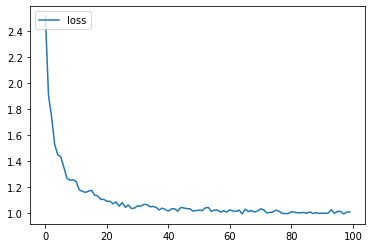

In [167]:
#red_wine에 대한 train
new_red_y_train = red_y_train-3
new_red_y_test = red_y_test-3
history = model.fit(red_x_train, new_red_y_train, batch_size = 10, epochs = 100,validation_data=(red_x_test, new_red_y_test))
plt.plot(history.history['loss'])
plt.legend(['loss'], loc = 'upper left')
plt.show()

In [168]:
#red wine에 대한 테스트
results = model.evaluate(red_x_test, new_red_y_test)
print('Test accuracy: ', results[1])

15/15 [==============================] - 0s 1ms/step - loss: 0.9279 - accuracy: 0.6354
Test accuracy:  0.6354166865348816


### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [0]:
total_wine = pd.concat([white_wine,red_wine])

In [170]:
total_wine.shape

(6497, 12)

In [0]:
total_x_train,total_y_train,total_x_test,total_y_test = generate_data(total_wine, 0.7)

In [0]:
##########################################################
model = models.Sequential()
model.add(layers.Dense(units=32,input_dim=11,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))

model.add(layers.Dense(units=50,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=100,activation='relu'))
model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=7, activation='softmax'))

############################################################

In [173]:
tf.keras.optimizers.Adam(
    learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=True,
    name='Adam'
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                384       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32)                128       
_________________________________________________________________
dense_71 (Dense)             (None, 50)                1650      
_________________________________________________________________
batch_normalization_27 (Batc (None, 50)                200       
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 100)               5100      
_________________________________________________________________
batch_normalization_28 (Batc (None, 100)             

Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 2.1313 - accuracy: 0.3020
Epoch 2/100
455/455 [==============================] - 1s 2ms/step - loss: 1.4883 - accuracy: 0.4042
Epoch 3/100
455/455 [==============================] - 1s 2ms/step - loss: 1.2929 - accuracy: 0.4453
Epoch 4/100
455/455 [==============================] - 1s 2ms/step - loss: 1.2298 - accuracy: 0.4656
Epoch 5/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1939 - accuracy: 0.4882
Epoch 6/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1822 - accuracy: 0.4922
Epoch 7/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1774 - accuracy: 0.4913
Epoch 8/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1699 - accuracy: 0.4942
Epoch 9/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1632 - accuracy: 0.4944
Epoch 10/100
455/455 [==============================] - 1s 2ms/step - loss: 1.1530 - accura

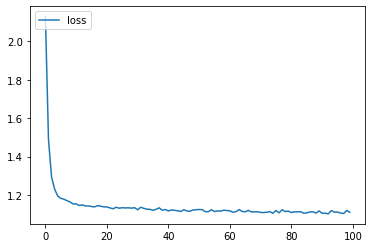

In [174]:
#total_wine에 대한 train
new_total_y_train = total_y_train-3
new_total_y_test = total_y_test-3
history = model.fit(total_x_train, new_total_y_train, batch_size = 10, epochs = 100)
plt.plot(history.history['loss'])
plt.legend(['loss'], loc = 'upper left')
plt.show()


In [175]:
#total wine에 대한 테스트
results = model.evaluate(total_x_test, new_total_y_test)
print('Test accuracy: ', results[1])

61/61 [==============================] - 0s 1ms/step - loss: 1.1055 - accuracy: 0.5585
Test accuracy:  0.5584615468978882
